In [1]:
# # 导入相关包
# import warnings
# from cProfile import label
# from sys import displayhook
# from tkinter.messagebox import showinfo

# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

# 设置sns样式
sns.set_theme(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt
# 导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# print(train.info(), test.info()) # 测试集不包含 survived 标签
# display(train.describe()) # 查看数据集的统计信息

In [3]:
# 数据合并，方便一起处理
full = pd.concat([train,test], ignore_index=True)
full.describe() # 发现有缺失数据

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
# 查看 info() 详情，得出没有明显异常值的结论
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

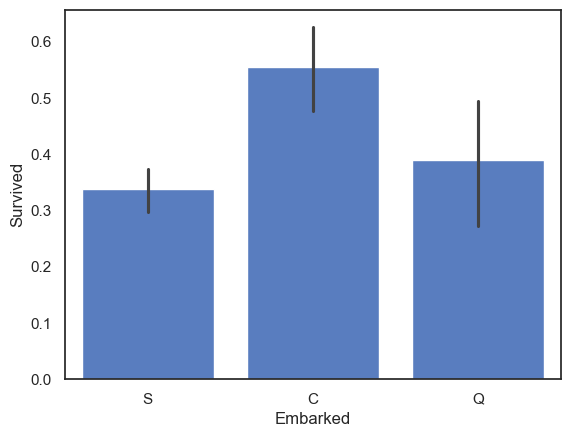

In [5]:
# 特征与标签的关系，首先查看港口和生死之间的关系
sns.barplot(data=train,x='Embarked',y='Survived')

In [6]:
# 计算不同类型 Embarked 的乘客，其生存率是多少
s = full.groupby('Embarked')['Survived'].value_counts().to_frame() # 根据 Embarked 分组，计算 Survived 列中每个值出现的次数
# display(s) # Embarked 和 Survived 是两级索引
s2 = s / s.groupby(level=0).sum() # 计算生存率
# display(s.groupby(level=0).sum())
# display(s2)
pd.merge(s, s2, left_index=True, right_index=True, suffixes=('_num','_rate')) # 两列名都为 count ，需要添加后缀以示区分

count_num  count_rate
Embarked Survived                       
C        1.0              93    0.553571
         0.0              75    0.446429
Q        0.0              47    0.610390
         1.0              30    0.389610
S        0.0             427    0.663043
         1.0             217    0.336957

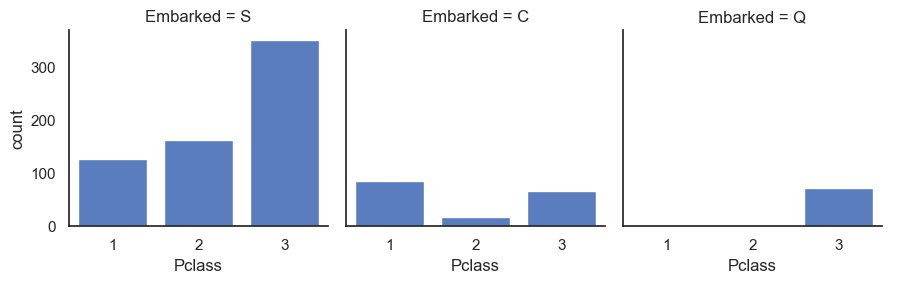

In [7]:
# 港口与舱位的关系
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', height=3)

<Axes: xlabel='Pclass', ylabel='Survived'>

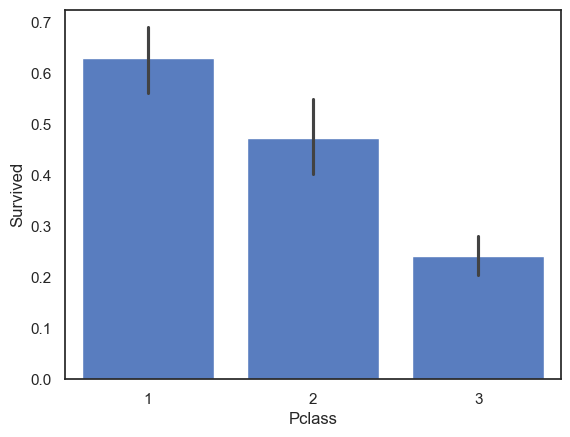

In [8]:
sns.barplot(data=train,x='Pclass',y='Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

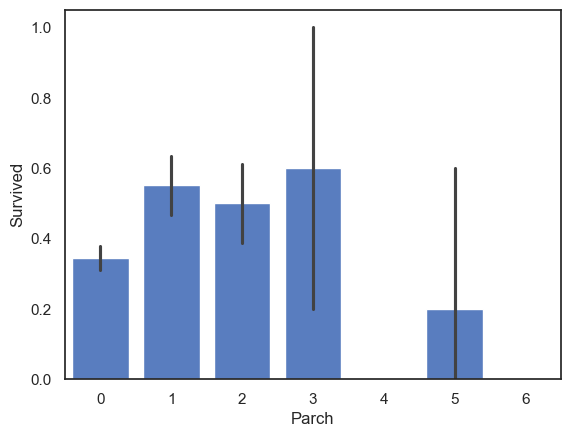

In [9]:
# 家长和孩子数量与生死的关系
sns.barplot(data=train, x='Parch', y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

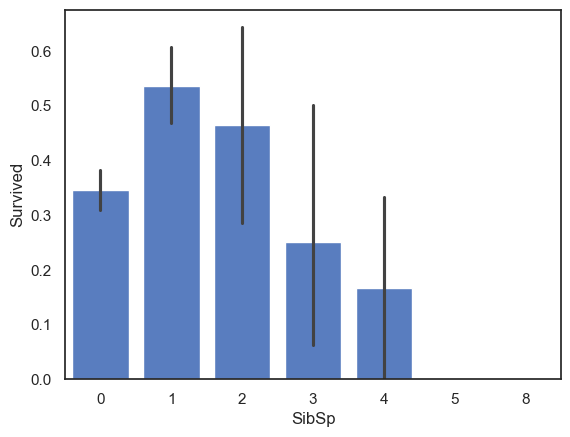

In [10]:
# 兄弟姐妹数量与生死的关系
sns.barplot(data=train, x='SibSp', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

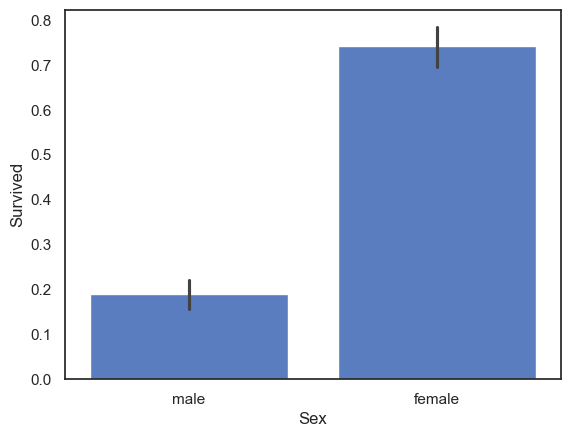

In [11]:
# 性别与生死的关系
sns.barplot(data=train, x='Sex', y='Survived')

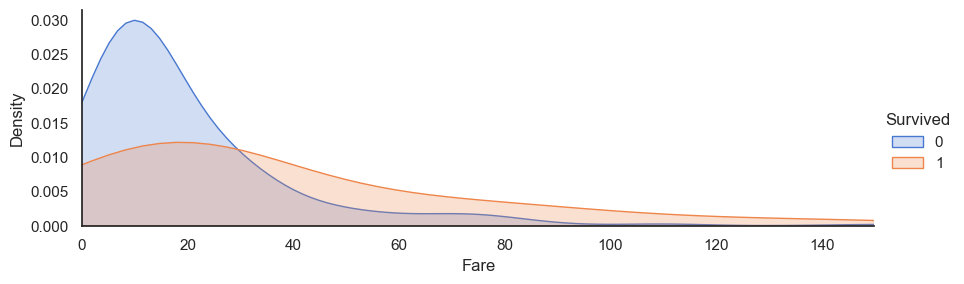

In [12]:
# 乘客花费与生死的关系
fareFacet = sns.FacetGrid(data=train, hue='Survived', aspect=3) # 绘制画布
fareFacet.map(sns.kdeplot, 'Fare', fill=True) # 绘制核密度图
fareFacet.set(xlim=(0,150)) # 设置 x 轴范围
fareFacet.add_legend() # 添加图例

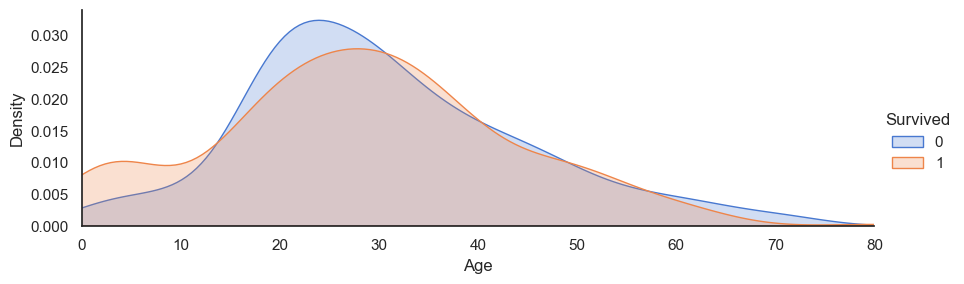

In [13]:
# 年龄与生死的关系
ageFacet = sns.FacetGrid(data=train, hue='Survived', aspect=3)
ageFacet.map(sns.kdeplot, 'Age', fill=True)
ageFacet.set(xlim=(0,80))
ageFacet.add_legend()

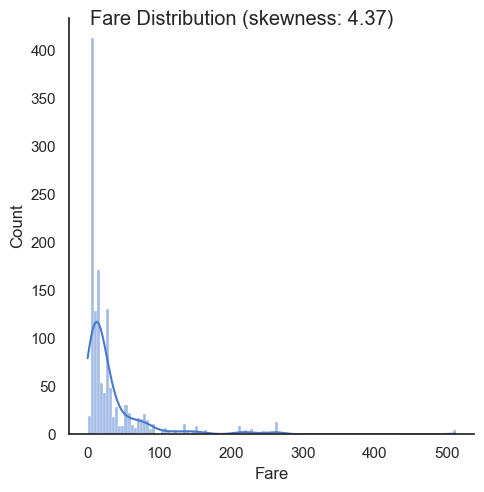

In [14]:
# 查看 fare 分布，看起来右偏
# 既有柱状图又有密度曲线
farePlot = sns.displot(full['Fare'][full['Fare'].notnull()], kde=True)
farePlot.fig.suptitle('Fare Distribution (skewness: %.2f)' % (full['Fare'].skew()))
farePlot.set_axis_labels('Fare', 'Count')

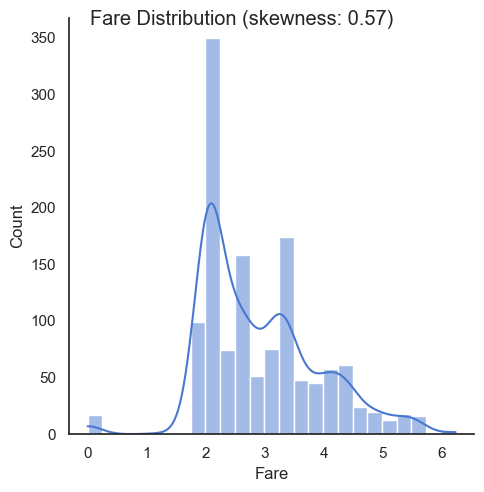

In [15]:
# 对数化处理 fare 值
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x > 0 else x)

# 处理之后票价 Fare 分布，偏度大幅降低
farePlot = sns.displot(full['Fare'][full['Fare'].notnull()], kde=True)
farePlot.fig.suptitle('Fare Distribution (skewness: %.2f)' % (full['Fare'].skew()))
farePlot.set_axis_labels('Fare', 'Count')

In [16]:
# 数据清洗
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [17]:
# 填充缺失值为 U (Unknown)
full['Cabin'] = full['Cabin'].fillna('U')

# full['Cabin'].head()

In [18]:
# 对 Embarked 缺失值进行填充，查看缺失值情况
display(full[full['Embarked'].isnull()])

display(full['Embarked'].value_counts().to_frame())

# 看起来填充一个 'S' 更合适
full['Embarked'] = full['Embarked'].fillna('S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


,count
Embarked,
S,914
C,270
Q,123


In [19]:
# 对 Fare 缺失值进行填充，查看缺失值情况
display(full[full['Fare'].isnull()])

Passengers_who_fare_is_null = full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]
display(Passengers_who_fare_is_null.head())

price = Passengers_who_fare_is_null['Fare'].mean()
print(price)
full['Fare'] = full['Fare'].fillna(price)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,U,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,U,S


2.4268473255457303


In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [21]:
# 构造新特征 Title
full['Title'] = full['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
# full['Title'].value_counts()

In [22]:
# 将 Title 信息进行整合
TitleDict = {}
TitleDict['Mr'] = 'Mr'
TitleDict['Mlle'] = 'Miss'
TitleDict['Miss'] = 'Miss'
TitleDict['Master'] = 'Master'
TitleDict['Jonkheer'] = 'Master'
TitleDict['Mme'] = 'Mrs'
TitleDict['Ms'] = 'Mrs'
TitleDict['Mrs'] = 'Mrs'
TitleDict['Don'] = 'Royalty'
TitleDict['Sir'] = 'Royalty'
TitleDict['the Countess'] = 'Royalty'
TitleDict['Dona'] = 'Royalty'
TitleDict['Lady'] = 'Royalty'
TitleDict['Capt'] = 'Officer'
TitleDict['Col'] = 'Officer'
TitleDict['Major'] = 'Officer'
TitleDict['Dr'] = 'Officer'
TitleDict['Rev'] = 'Officer'

full['Title'] = full['Title'].map(TitleDict)
# full['Title'].value_counts()

<Axes: xlabel='Title', ylabel='Survived'>

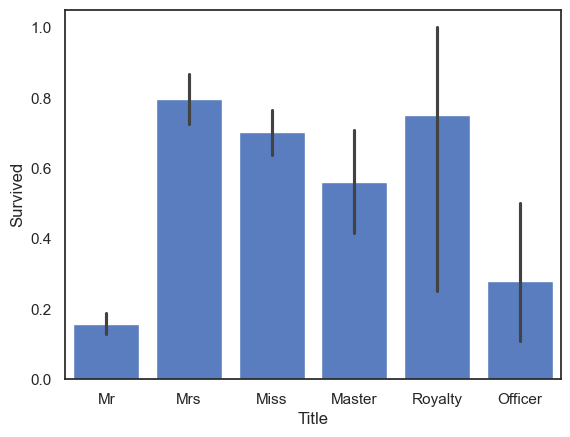

In [23]:
# 可视化分析 Title 与 Survived 的关系
sns.barplot(data=full, x='Title', y='Survived')

<Axes: xlabel='FamilyNum', ylabel='Survived'>

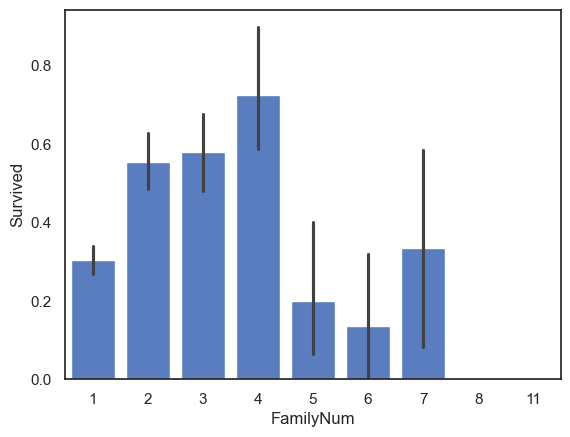

In [24]:
# 家庭成员数量
full['FamilyNum'] = full['SibSp'] + full['Parch'] + 1
# 查看 FamilyNum 与 Survived 的关系
sns.barplot(data=full, x='FamilyNum', y='Survived')

<Axes: xlabel='FamilySize', ylabel='Survived'>

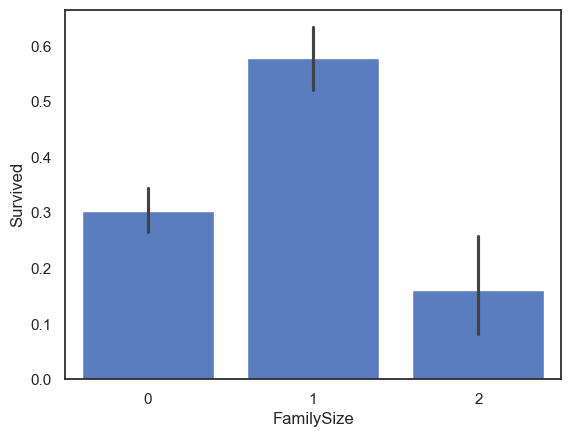

In [25]:
# 我们按照家庭成员人数多少，将家庭规模分为小(0)，中(1)，大(2)三类，方便后续分析
def family_size(family_num):
    if family_num == 1:
        return 0
    elif 2 <= family_num <= 4:
        return 1
    else:
        return 2

full['FamilySize'] = full['FamilyNum'].map(family_size)
# full['FamilySize'].value_counts()
# 查看 FamilySize 与 Survived 的关系
sns.barplot(data=full, x='FamilySize', y='Survived')

[Text(0.5, 1.0, 'Desk Value Counts'),
 Text(0.5, 0, 'Desk'),
 Text(0, 0.5, 'Count')]

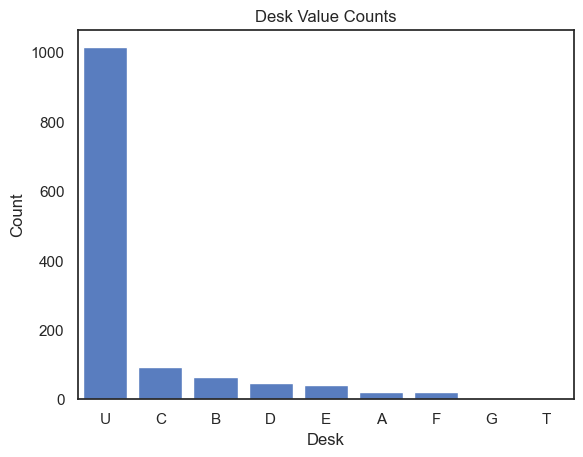

In [26]:
# 船舱的类型
# 提取 Cabin 字段首字母
full['Desk'] = full['Cabin'].map(lambda x: x[0])
# full['Cabin'].unique()
sns.barplot(x=full['Desk'].value_counts().index, y=full['Desk'].value_counts().values).set(title='Desk Value Counts', xlabel='Desk', ylabel='Count')

<Axes: xlabel='Desk', ylabel='Survived'>

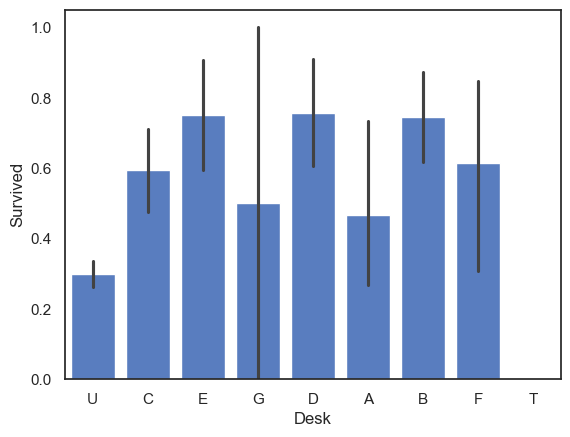

In [27]:
# 查看 Desk 与 Survived 的关系
sns.barplot(data=full, x='Desk', y='Survived')

In [28]:
# 共号票乘客数量 TickCom 及 TickGroup
TickCountDict = full['Ticket'].value_counts()
# TickCountDict.head(5)

In [29]:
# 将同号票乘客数量数据并入数据集中，命名为 TickCom
full['TickCom'] = full['Ticket'].map(TickCountDict)
full.head()
# full[full['Ticket'] == '349909']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,Desk,TickCom
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1


[Text(0.5, 1.0, 'TickCom Value Counts'),
 Text(0.5, 0, 'TickCom'),
 Text(0, 0.5, 'Count')]

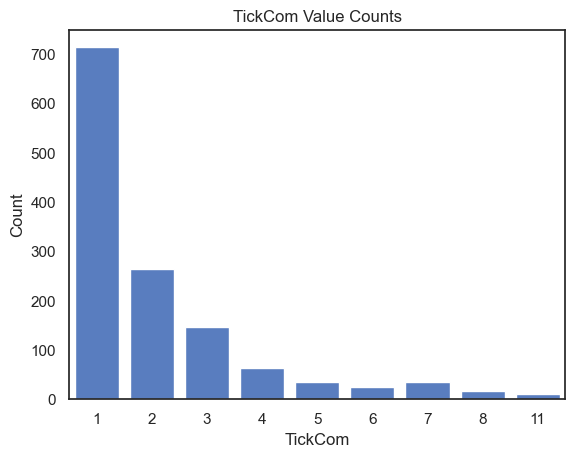

In [30]:
# 查看 TickCom 的分布情况
sns.barplot(x=full['TickCom'].value_counts().index, y=full['TickCom'].value_counts().values).set(title='TickCom Value Counts', xlabel='TickCom', ylabel='Count')

<Axes: xlabel='TickCom', ylabel='Survived'>

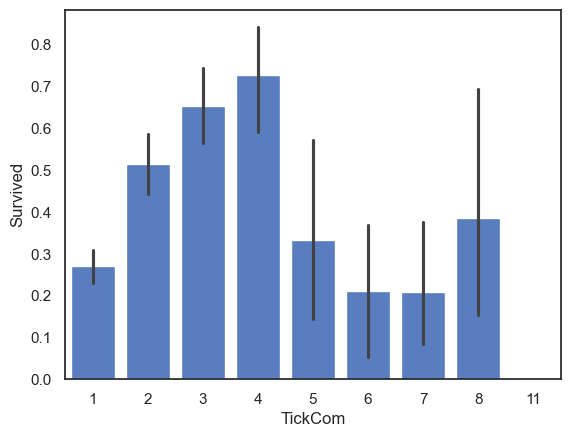

In [31]:
# 查看 TickCom 与 Survived 的关系
sns.barplot(data=full, x='TickCom', y='Survived')

<Axes: xlabel='TickGroup', ylabel='Survived'>

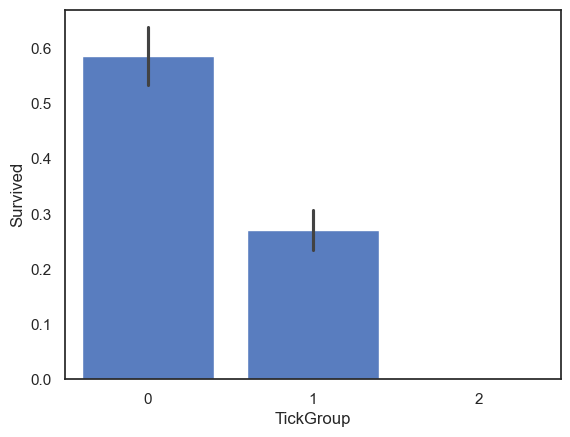

In [32]:
# 按照 TickCom 大小，将乘客分为三类
def TickCountGroup(num):
    if 2 <= num <= 4:
        return 0
    elif num ==1  or 5 <= num <= 8:
        return 1
    else:
        return 2

# 得到各位乘客 TickGroup 的类别
full['TickGroup'] = full['TickCom'].map(TickCountGroup)
# 查看 TickGroup 与 Survived 的关系
sns.barplot(data=full, x='TickGroup', y='Survived')

In [33]:
# 首先查看数据，然后计划填充 Age 缺失值
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  Desk         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [34]:
# 查看相关性系数 corr
full[full['Age'].notnull()].select_dtypes(include=[float, int]).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyNum,FamilySize,TickCom,TickGroup
PassengerId,1.000000,0.029340,-0.064097,0.028814,-0.050700,-0.021096,0.038722,-0.044024,-0.048093,-0.013838,-0.005325
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.342920,0.042787,0.106359,0.093239,-0.322862
Pclass,-0.064097,-0.359653,1.000000,-0.408106,0.047221,0.017224,-0.741394,0.039602,-0.074864,-0.114293,0.311226
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.185284,-0.005224
SibSp,-0.050700,-0.017358,0.047221,-0.243699,1.000000,0.374456,0.294004,0.844260,0.779310,0.621362,-0.131130
Parch,-0.021096,0.093317,0.017224,-0.150917,0.374456,1.000000,0.318137,0.813080,0.705738,0.641500,-0.162860
Fare,0.038722,0.342920,-0.741394,0.194038,0.294004,0.318137,1.000000,0.368463,0.451368,0.603769,-0.439788
FamilyNum,-0.044024,0.042787,0.039602,-0.240229,0.844260,0.813080,0.368463,1.000000,0.897180,0.760887,-0.176458
FamilySize,-0.048093,0.106359,-0.074864,-0.174901,0.779310,0.705738,0.451368,0.897180,1.000000,0.661291,-0.401090
TickCom,-0.013838,0.093239,-0.114293,-0.185284,0.621362,0.641500,0.603769,0.760887,0.661291,1.000000,-0.203938


In [35]:
# 筛选数据集
agePre = full[['Age', 'Parch', 'Pclass', 'SibSp', 'FamilyNum', 'TickCom', 'Title']]

In [36]:
# 进行 one-hot 编码
agePre = pd.get_dummies(agePre)
ageCorrDf = agePre.corr()
# ageCorrDf['Age'].sort_values()

In [37]:
agePre.head(5)

,Age,Parch,Pclass,SibSp,FamilyNum,TickCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,False,False,True,False,False,False
1,38.0,0,1,1,2,2,False,False,False,True,False,False
2,26.0,0,3,0,1,1,False,True,False,False,False,False
3,35.0,0,1,1,2,2,False,False,False,True,False,False
4,35.0,0,3,0,1,1,False,False,True,False,False,False


In [38]:
# 拆分实验集和预测集
ageKnown = agePre[agePre['Age'].notnull()]
ageUnknown = agePre[agePre['Age'].isnull()]

# 生成实验数据的特征和标签
ageKnown_X = ageKnown.drop(['Age'], axis=1)
ageKnown_y = ageKnown['Age']

# 生成预测数据的特征
ageUnknown_X = ageUnknown.drop(['Age'], axis=1)

In [39]:
# 利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=None, n_estimators=500, n_jobs=-1)
rfr.fit(ageKnown_X, ageKnown_y)

# 模型得分（准确度）
rfr.score(ageKnown_X, ageKnown_y)

0.5866063683819069

In [40]:
# 预测年龄
ageUnknown_predict = rfr.predict(ageUnknown_X)

# 填充预测数据
full.loc[(full['Age'].isnull()), 'Age'] = ageUnknown_predict
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  Desk         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [41]:
# 同组识别
full['Surname'] = full['Name'].map(lambda x: x.split(',')[0].strip())
SurNameDict = full['Surname'].value_counts()
# SurNameDict.head(5)

In [42]:
full['SurnameNum'] = full['Surname'].map(SurNameDict)

# 12 岁以上男性，找出男性中同姓氏均获救的部分
MaleDf = full[(full['Age']>=12) & (full['Sex']=='male') & (full['FamilyNum']>=2)]
MaleDf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum,FamilySize,Desk,TickCom,TickGroup,Surname,SurnameNum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1,1,Braund,2
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,3.442819,U,S,Mr,7,2,U,7,1,Andersson,11
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,5.572154,C23 C25 C27,S,Mr,6,2,C,6,1,Fortune,6
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,4.408800,U,C,Mr,2,1,U,2,0,Meyer,3
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,3.951244,U,S,Mr,2,1,U,2,0,Holverson,2


In [43]:
# 分析男性同组效应
MSurNameDf = MaleDf.dropna(subset=['Survived']).groupby('Surname')['Survived'].mean()
# MSurNameDf.value_counts()
# 这里的 Survived == 1 的行数据存在问题，教程中这行的 count 是 19

In [44]:
# 女性及儿童同组效应分析
# 提取乘客的姓氏及相应的乘客数
full['Surname'] = full['Name'].map(lambda x: x.split(',')[0].strip())
SurNameDict = full['Surname'].value_counts()
full['SurnameNum'] = full['Surname'].map(SurNameDict)

# 将数据分为两组
FemChildDf = full[((full['Sex']=='female')|(full['Age']<=12))&(full['FamilyNum']>=2)]

FCSurNameDf = FemChildDf.dropna(subset=['Survived']).groupby('Surname')['Survived'].mean()
# FCSurNameDf.value_counts()

In [45]:
# 直接修改数据，这一操作等价于定制算法，添加权重，不过不可迁移
# 获取 M 中生存率为 1 的姓氏
MSurNameDict = MSurNameDf[MSurNameDf.values==1].index # MSurNameDf.values==1 是先将 DataFrame 转换为一个 NumPy 数组，然后元素是否等于 1，返回一个同大小的布尔数组
# 获取 F 和 C 中生存率为 0 的姓氏
FCSurNameDict = FCSurNameDf[FCSurNameDf.values==0].index
MSurNameDict, FCSurNameDict

(Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
        'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
        'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
        'Nakid', 'Nicola-Yarred', 'Persson', 'Taylor'],
       dtype='object', name='Surname'),
 Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
        'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
        'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
        'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
        'Vander Planke', 'Zabour'],
       dtype='object', name='Surname'))

In [46]:
# 对数据集中这些姓氏的男性进行修正：性别改为女，年龄改为 5
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(MSurNameDict)) & (full['Sex']=='male'), 'Sex'] = 'female'
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(MSurNameDict)) & (full['Sex']=='male'), 'Age'] = 5
# 对数据集中这些姓氏的女性及儿童进行修正：性别改为男，年龄改为 60
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(FCSurNameDict)) & (full['Sex']=='female') & (full['Age']<=12), 'Sex'] = 'male'
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(FCSurNameDict)) & (full['Sex']=='female') & (full['Age']<=12), 'Age'] = 60

In [47]:
# 条件筛选，先人工筛选
fullSel = full.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Surname', 'SurnameNum'], axis=1) # 姓氏已经在同组识别中使用过了，没有用处了
fullSel.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyNum,FamilySize,Desk,TickCom,TickGroup
0,0.0,3,male,22.0,1,0,1.981001,S,Mr,2,1,U,1,1
1,1.0,1,female,38.0,1,0,4.266662,C,Mrs,2,1,C,2,0
2,1.0,3,female,26.0,0,0,2.070022,S,Miss,1,0,U,1,1
3,1.0,1,female,35.0,1,0,3.972177,S,Mrs,2,1,C,2,0
4,0.0,3,male,35.0,0,0,2.085672,S,Mr,1,0,U,1,1


In [48]:
corrDf = fullSel.select_dtypes(include=['number']).corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059723
SibSp        -0.035322
FamilyNum     0.016639
TickCom       0.064962
Parch         0.081629
FamilySize    0.108631
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

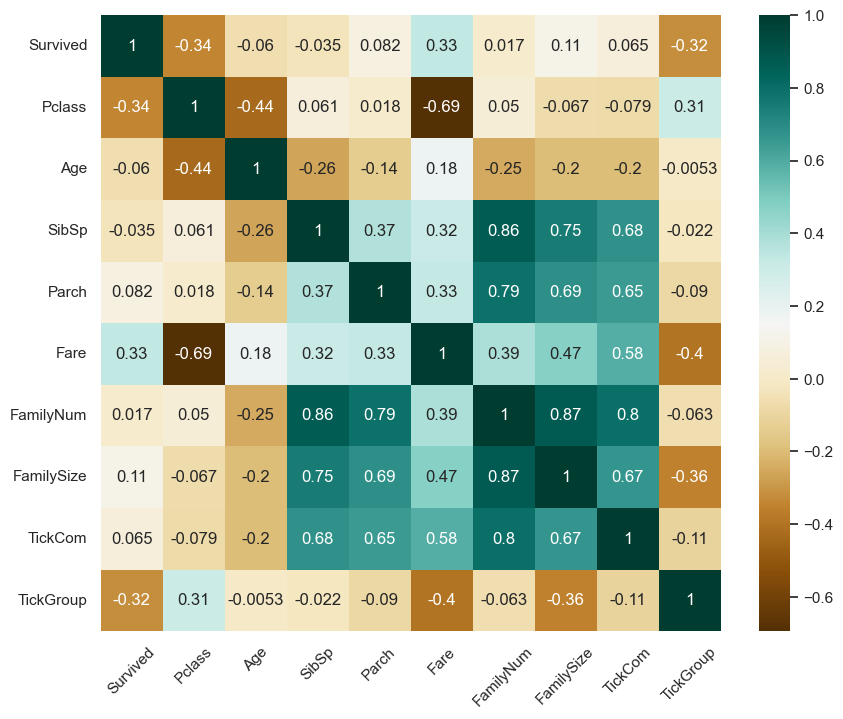

In [49]:
# 热力图，查看 Survived 与其他特征间相关性大小
plt.figure(figsize=(10, 8))
sns.heatmap(corrDf, cmap='BrBG', annot=True)
_ = plt.xticks(rotation=45)

In [50]:
# 删除相关性系数低的属性
fullSel = fullSel.drop(['Age', 'Parch', 'SibSp', 'FamilyNum', 'TickCom'], axis=1)

# one-hot 编码
fullSel = pd.get_dummies(fullSel)
fullSel.head(5)

,Survived,Pclass,Fare,FamilySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Desk_A,Desk_B,Desk_C,Desk_D,Desk_E,Desk_F,Desk_G,Desk_T,Desk_U
0,0.0,3,1.981001,1,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,4.266662,1,0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,2.070022,0,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,3.972177,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,2.085672,0,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
